In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display

In [118]:
df = pd.read_csv("https://raw.githubusercontent.com/ameer-fice/ai-vodafone/main/datasets/Melbourne_housing_FULL.csv")
display(df)
df.info()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [119]:
num_col= df.dtypes[df.dtypes!='object'].index.values
cat_col= df.dtypes[df.dtypes=='object'].index.values


In [120]:
df[cat_col].nunique() #checking number of unique values

Suburb           351
Address        34009
Type               3
Method             9
SellerG          388
Date              78
CouncilArea       33
Regionname         8
dtype: int64

In [121]:
for col in cat_col:
    display(df[col].unique())
    if (len(df[col].unique())<50) :
        df=df.drop(col,axis=1)

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

array(['68 Studley St', '85 Turner St', '25 Bloomburg St', ...,
       '147A Severn St', '12/37 Stephen St', '3 Tarrengower St'],
      dtype=object)

array(['h', 'u', 't'], dtype=object)

array(['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA'], dtype=object)

array(['Jellis', 'Biggin', 'Rounds', 'Nelson', 'Collins', 'Dingle',
       'Purplebricks', 'Greg', 'Philip', 'LITTLE', 'Kay', 'Beller',
       'Marshall', 'hockingstuart', 'Brad', 'Maddison', 'Barry',
       'Airport', 'Considine', 'Rendina', 'Ray', 'Propertyau', 'McDonald',
       'Frank', 'Prof.', 'Harcourts', 'Thomson', 'Buxton', 'RT',
       "Sotheby's", 'Cayzer', 'Chisholm', 'McGrath', 'Brace', 'Miles',
       'Holland', 'Love', 'Thomas', 'Barlow', 'Sweeney', 'Village', 'Jas',
       'Williams', 'Gunn&Co', 'Burnham', 'Point', 'Compton', 'FN',
       'Hunter', 'Raine&Horne', 'Noel', 'Hodges', 'Gary', 'Fletchers',
       'Woodards', 'Raine', 'Alexkarbon', 'Walshe', 'Weda', 'Stockdale',
       'Tim', 'Buxton/Marshall', 'AIME', 'Moonee', 'HAR', 'Edward', 'RW',
       'North', 'MICM', 'Ascend', 'Christopher', 'Morrison', 'Bekdon',
       'Mandy', 'R&H', 'Fletchers/One', 'Lindellas', 'Appleby', 'Assisi',
       'One', 'Owen', 'Parkes', 'C21', 'Century', "O'Brien", 'Bayside',
       'And

array(['3/09/2016', '3/12/2016', '4/02/2016', '4/03/2017', '4/06/2016',
       '6/08/2016', '7/05/2016', '7/11/2016', '8/10/2016', '10/12/2016',
       '12/11/2016', '13/08/2016', '14/05/2016', '15/10/2016',
       '16/04/2016', '16/07/2016', '17/09/2016', '18/03/2017',
       '18/06/2016', '19/11/2016', '22/05/2016', '22/08/2016',
       '23/04/2016', '24/09/2016', '25/02/2017', '26/07/2016',
       '27/11/2016', '28/05/2016', '30/07/2016', '10/09/2016',
       '11/02/2017', '27/06/2016', '28/08/2016', '12/06/2016',
       '11/03/2017', '28/01/2016', '6/05/2017', '8/04/2017', '13/05/2017',
       '29/04/2017', '20/05/2017', '22/04/2017', '1/07/2017', '3/06/2017',
       '17/06/2017', '24/06/2017', '27/05/2017', '8/07/2017',
       '12/08/2017', '15/07/2017', '22/07/2017', '29/07/2017',
       '3/09/2017', '9/09/2017', '16/09/2017', '19/08/2017', '23/09/2017',
       '26/08/2017', '7/10/2017', '14/10/2017', '21/10/2017',
       '28/10/2017', '30/09/2017', '4/11/2017', '11/11/2017',
   

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Cardinia Shire Council', 'Whittlesea City Council',
       'Frankston City Council', 'Macedon Ranges Shire Council',
       'Yarra Ranges Shire Council', 'Wyndham City Council',
       'Moorabool Shire Council', 'Mitchell Shire Council', nan],
      dtype=object)

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria', nan], dtype=object)

In [122]:
display(df.head())
display(df.shape)

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,Abbotsford,68 Studley St,2,NaN,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0
1,Abbotsford,85 Turner St,2,1480000.0,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,Abbotsford,25 Bloomburg St,2,1035000.0,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,Abbotsford,18/659 Victoria St,3,NaN,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0
4,Abbotsford,5 Charles St,3,1465000.0,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


(34857, 17)

In [123]:
df

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,Abbotsford,68 Studley St,2,NaN,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.80140,144.99580,4019.0
1,Abbotsford,85 Turner St,2,1480000.0,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
2,Abbotsford,25 Bloomburg St,2,1035000.0,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
3,Abbotsford,18/659 Victoria St,3,NaN,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.81140,145.01160,4019.0
4,Abbotsford,5 Charles St,3,1465000.0,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,1480000.0,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,-37.81053,144.88467,6543.0
34853,Yarraville,29A Murray St,2,888000.0,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.88826,6543.0
34854,Yarraville,147A Severn St,2,705000.0,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,-37.82286,144.87856,6543.0
34855,Yarraville,12/37 Stephen St,3,1140000.0,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6543.0


In [124]:
a = df[['Rooms','Bedroom2']].dropna()
print(a)
(a['Rooms']==a["Bedroom2"]).value_counts()

       Rooms  Bedroom2
0          2       2.0
1          2       2.0
2          2       2.0
3          3       3.0
4          3       3.0
...      ...       ...
34851      3       3.0
34852      4       4.0
34853      2       2.0
34854      2       2.0
34856      2       2.0

[26640 rows x 2 columns]


True     25692
False      948
dtype: int64

In [126]:
df=df.drop(columns=['Bedroom2','Lattitude','Longtitude','Postcode'])
display(df)

,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,Abbotsford,68 Studley St,2,NaN,Jellis,3/09/2016,2.5,1.0,1.0,126.0,NaN,NaN,4019.0
1,Abbotsford,85 Turner St,2,1480000.0,Biggin,3/12/2016,2.5,1.0,1.0,202.0,NaN,NaN,4019.0
2,Abbotsford,25 Bloomburg St,2,1035000.0,Biggin,4/02/2016,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
3,Abbotsford,18/659 Victoria St,3,NaN,Rounds,4/02/2016,2.5,2.0,1.0,0.0,NaN,NaN,4019.0
4,Abbotsford,5 Charles St,3,1465000.0,Biggin,4/03/2017,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,1480000.0,Jas,24/02/2018,6.3,1.0,3.0,593.0,NaN,NaN,6543.0
34853,Yarraville,29A Murray St,2,888000.0,Sweeney,24/02/2018,6.3,2.0,1.0,98.0,104.0,2018.0,6543.0
34854,Yarraville,147A Severn St,2,705000.0,Jas,24/02/2018,6.3,1.0,2.0,220.0,120.0,2000.0,6543.0
34855,Yarraville,12/37 Stephen St,3,1140000.0,hockingstuart,24/02/2018,6.3,NaN,NaN,NaN,NaN,NaN,6543.0


In [127]:
col = ['Distance','Bathroom','Car','Propertycount']
df[col]=df[col].fillna(0)
df['Landsize']= df['Landsize'].fillna(df['Landsize'].mean())
df['BuildingArea']= df['BuildingArea'].fillna(df['BuildingArea'].mean())
df["YearBuilt"] = 2024-df['YearBuilt']
df=df.dropna()

In [128]:
df2=df.copy().select_dtypes(exclude=['object'])
df2.head(2)

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
2,2,1035000.0,2.5,1.0,0.0,156.0,79.0,124.0,4019.0
4,3,1465000.0,2.5,2.0,0.0,134.0,150.0,124.0,4019.0


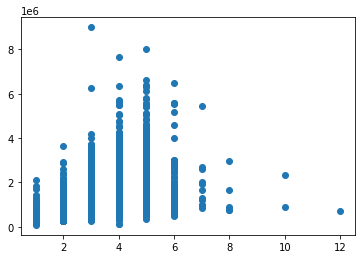

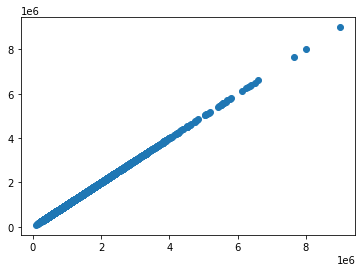

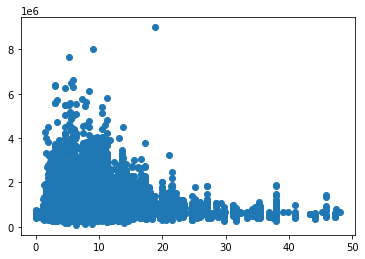

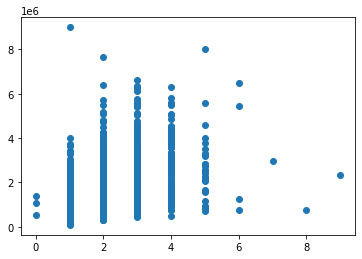

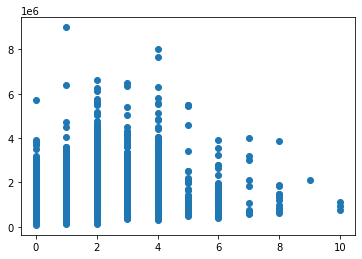

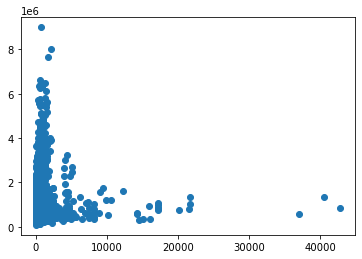

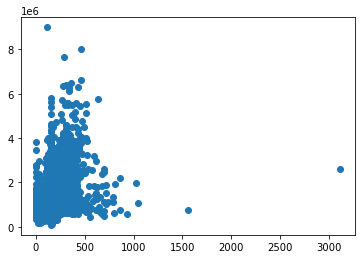

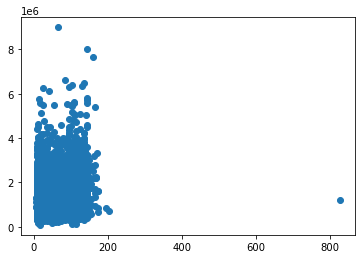

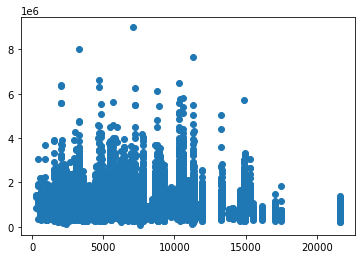

In [129]:
for i in df2.columns:
    plt.scatter(df[i],df['Price'])
    plt.show()